# Luxury Goods Industry: Market Analysis
### Capstone Project
### Ryan Blackadar, Juno College of Technology, December 2021

### Data Question: What was the effect of the COVID-19 Pandemic on the Luxury Goods Industry?

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from datetime import datetime

#Yahoo! Finance Library: 
#Source: https://pypi.org/project/yfinance/ 

import yfinance as yf

In [2]:
#Defining variables for the Yahoo! Finance Ticker symbols

lvmh = yf.Ticker('mc.pa')
kering = yf.Ticker('ker.pa')
hermes = yf.Ticker('rms.pa')
dior = yf.Ticker('cdi.pa')

### What Company Information is Available Using yfinance?

In [3]:
#Preview information for Louis Vuitton - Moet Hennessy

lvmhinfo = lvmh.info

for key,value in lvmhinfo.items():
    print (key, ":", value)

zip : 75008
sector : Consumer Cyclical
fullTimeEmployees : 148343
longBusinessSummary : LVMH MoÃ«t Hennessy - Louis Vuitton, SociÃ©tÃ© EuropÃ©enne operates as a luxury products company. The company offers champagnes, wines, and spirits under the Ao Yun, Ardbeg, Belvedere, Bodega Numanthia, Cape Mentelle, Chandon, ChÃ¢teau Cheval Blanc, ChÃ¢teau d'Yquem, Cheval des Andes, Clos des Lambrays, Clos19, Cloudy Bay, Dom PÃ©rignon, Glenmorangie, Hennessy, Krug, Mercier, MoÃ«t & Chandon, Newton, Vineyard, Ruinart, Terrazas de los Andes, Veuve Clicquot, Volcan de mi Tierra, and Woodinville brands. It also provides fashion and leather products under the Berluti, Celine, Christian Dior, Emilio Pucci, Fendi, Givenchy, Kenzo, Loewe, Loro Piana, Louis Vuitton, Marc Jacobs, Moynat, Nicholas Kirkwood, Pink Shirtmaker, and Rimowa brands. In addition, the company offers perfumes and cosmetics under the Acqua di Parma, Benefit Cosmetics, Fenty Beauty by Rihanna, Fresh, Parfums Givenchy, Guerlain, Kat Von 

## Creation of Data Sets

### Setting Up a Scraping Tool to Export Stock Data to .csv

In [4]:
#Create a datetime function which defines "today" as a variable which always aligns with the present day
#This will allow new stock data to be added to the .csv after each business day
#The .csv files are on a "live" data source connection to Tableau

today = datetime.now().date().strftime("%Y-%m-%d")

In [5]:
#Scrape and export the most up to date stock data for each of the companies requested below
#Use 'today' variable as set above

#CAC40 Stock Index (spanning back to 2007):

cac40data = yf.download("^FCHI", start='2007-11-30', end=today)
cac40data.to_csv('CAC40.csv')

#Luxury Goods Companies (spanning back to 2007):

lvmhdata = yf.download("mc.pa", start='2007-11-30', end=today)
lvmhdata.to_csv('LVMH.csv')

diordata = yf.download("cdi.pa", start='2007-11-30', end=today)
diordata.to_csv('Dior.csv')

hermesdata = yf.download("rms.pa", start='2007-11-30', end=today)
hermesdata.to_csv('Hermès.csv')

keringdata = yf.download("ker.pa", start='2007-11-30', end=today)
keringdata.to_csv('Kering.csv')

richemontdata = yf.download("CFR.SW", start='2007-11-30', end=today)
richemontdata.to_csv('Richemont.csv')

#Fast Fashion Companies (spanning back to 2019):

inditexdata = yf.download("ITX.MC", start='2019-12-01', end=today)
inditexdata.to_csv('Inditex.csv')

HMdata = yf.download("HM-B.ST", start='2019-12-01', end=today)
HMdata.to_csv('H&M.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Fundamental Analysis of Stock Symbols
### Using yfinance, an investor can quickly and easily compare companies based on the fundamentals that are of interest

In [6]:
#Store the desired ticker symbols to be compared

tickers = ['mc.pa', 'ker.pa', 'rms.pa', 'cdi.pa']
infos = []
for i in tickers:
    infos.append(yf.Ticker(i).info)

#Define which fundamentals are of interest for the analysis (key values from 'info' dict)

fundamentals = ["shortName", "dividendYield", "dividendRate", "marketCap", "beta", 'trailingPE', 'ebitda', 'previousClose']

#Create a new data frame based on the infos list

f_analysis = pd.DataFrame(infos)

#Assign ticker symbols as the index of the dataframe
f_analysis = f_analysis.set_index('symbol')

#Filter the dataframe only to see the fundamentals specified above
f_analysis = f_analysis[f_analysis.columns[f_analysis.columns.isin(fundamentals)]]

#Order the columns as specified
f_analysis = f_analysis[["shortName", "dividendYield", "dividendRate", "previousClose", "trailingPE", "ebitda", "beta", "marketCap"]]
f_analysis

,shortName,dividendYield,dividendRate,previousClose,trailingPE,ebitda,beta,marketCap
symbol,,,,,,,,
MC.PA,LVMH,0.0097,7.00,714.7,37.928833,16039999488,0.946319,358562496512
KER.PA,KERING,0.0111,8.00,717.5,26.325779,4994299904,0.972329,87765704704
RMS.PA,HERMES INTL,0.0029,4.55,1577.0,74.733270,3549600000,0.347537,165651447808
CDI.PA,CHRISTIAN DIOR,0.0100,7.00,694.0,32.364260,15630000128,0.958494,125926883328


## Visualizing Features of the Fundamental Analysis
### How do the dividend yields compare?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'LVMH'),
  Text(1, 0, 'KERING'),
  Text(2, 0, 'HERMES INTL'),
  Text(3, 0, 'CHRISTIAN DIOR')])

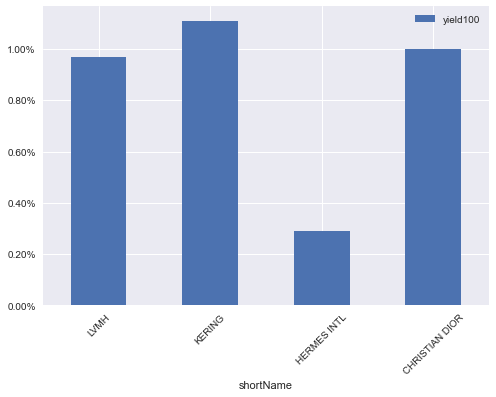

In [7]:
#Bar Plot to compare Dividend Yield #

#Multiply the dividendYield by 100 to reflect %
f_analysis['yield100'] = f_analysis['dividendYield']*100

#Bar plot of the dividend yields
ax = f_analysis.plot.bar(x='shortName',y='yield100')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)

## Visualizing Trends Using Simple Moving Average

### Simple Moving Average Visualization: CAC40

<AxesSubplot:xlabel='Date'>

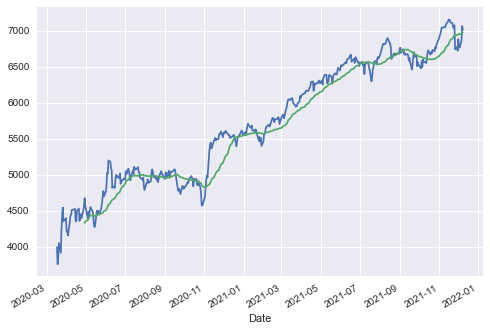

In [8]:
#Simple Moving Average
df_cac40 = pd.read_csv('CAC40.csv', index_col='Date', parse_dates=True)

#Index locator starting with March 17, 2020 to analyze recovery trend
df_cac40_recovery = df_cac40.loc['2020-03-17':]

#Plot a 30-day moving average line compared to the stock price

df_cac40_recovery['Adj Close'].plot()
df_cac40_recovery['Adj Close'].rolling(window=30).mean().plot()

### Simple Moving Average Visualization: Hermès

<AxesSubplot:xlabel='Date'>

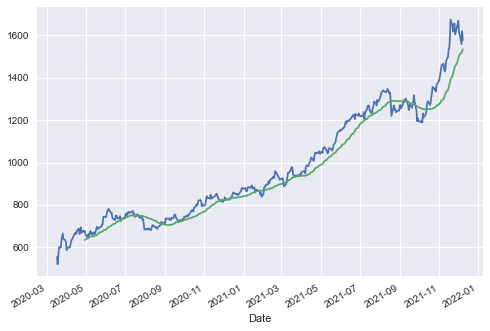

In [9]:
#Simple Moving Average
df_hermes = pd.read_csv('Hermès.csv', index_col='Date', parse_dates=True)

#Index locator starting with March 17, 2020 to analyze recovery trend
df_hermes_recovery = df_hermes.loc['2020-03-17':]

#Plot a 30-day moving average line compared to the stock price

df_hermes_recovery['Adj Close'].plot()
df_hermes_recovery['Adj Close'].rolling(window=30).mean().plot()

### Ethics and Implications

For the purposes of analysis in this project, public data is being used. Historical stock prices and company profile information are readily and publicly available and do not pose an ethical concern. None of the information has been sourced privately nor internally.

When it comes to ethical outlooks on the businesses or the investments themselves, investors may wish to consult information relating to Sustainability into their decision making process.

### Conclusion and Takeaways

Using data scraped from the Yahoo!Finance api in Python,  combined with visualization tools in Tableau, we can see that despite the inital setback in March 2020, companies in the luxury sector have rebounded significantly. When compared to the French stock market index as a benchmark, these companies have out-performed in stock price growth. 

This is insightful information for potential investors and will be helpful when making investment decisions. Stock market data is unable to tell us what the next pandemic will look like or when it will happen. What it tells us is how this industry fared with COVID-19.